In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
 
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

import torch 
import utils 

import pprint
from datasets.dataset_loading import CocoLoader,get_coco_split

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
transforms = None
coco_dataset = CocoLoader(get_coco_split(split="val"), transform=transforms)

No root provided, using default
loading annotations into memory...
Done (t=0.76s)
creating index...
index created!


In [6]:
path = (
    "./out/pipeline_results/GroundingDinoTiny_SamWrapper_b_categories_coco_val_5000_09_04"
)

# index array translates index in other arrays to index in the dataset

# coco classes:
#   ./out/pipeline_results/GroundingDinoTiny_SamWrapper_b_dataset_defaults_coco_val_5000_09_04

# general:
#   ./out/pipeline_results/GroundingDinoTiny_SamWrapper_b_general_coco_val_5000_09_04

# categories:
#   ./out/pipeline_results/GroundingDinoTiny_SamWrapper_b_categories_coco_val_5000_09_04

# GT: without middle
#  ./out/pipeline_results/GTboxDetector_SamWrapper_b_dataset_defaults_coco_val_5000_09_04

prompt list:  categories
# missed GTs, det and seg:
7179
8866

detection mean IoU:  0.6765985488891602
     mAP:  0.32172706723213196
     mAR - small:  0.3613662123680115
     mAR - medium:  0.6283230781555176
     mAR - large:  0.8272196054458618
segmentation mean IoU:  0.5863916277885437
     mAP:  0.32172706723213196
     mAR - small:  0.3613662123680115
     mAR - medium:  0.6283230781555176
     mAR - large:  0.8272196054458618


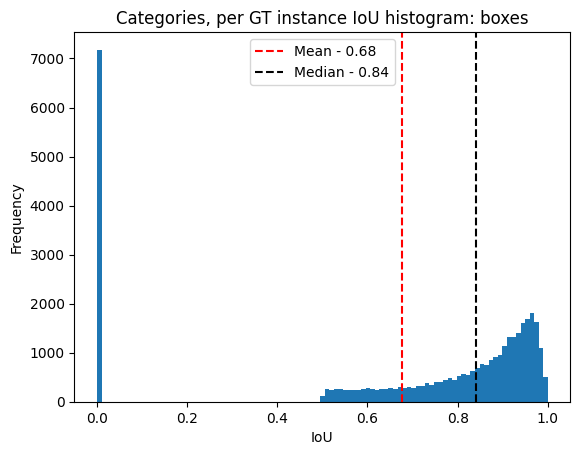

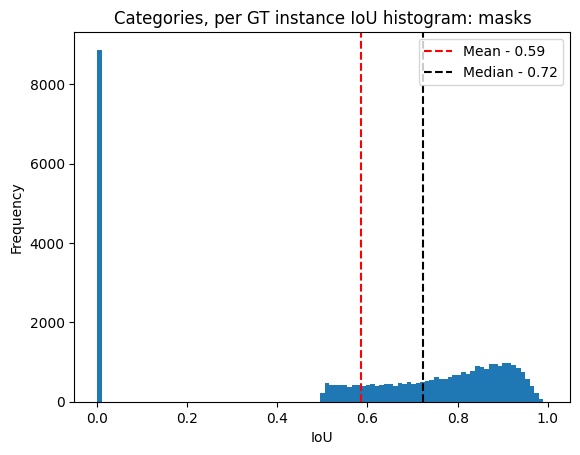

,category,missed,total,part_missed
2,car,1179,1932,0.610248
73,book,814,1161,0.701120
9,traffic light,565,637,0.886970
0,person,505,11004,0.045892
56,chair,236,1791,0.131770
8,boat,229,430,0.532558
25,umbrella,178,413,0.430993
26,handbag,168,540,0.311111
14,bird,160,440,0.363636
51,carrot,156,371,0.420485


,category,missed,total,part_missed
9,traffic light,565,637,0.886970
73,book,814,1161,0.701120
2,car,1179,1932,0.610248
35,baseball glove,88,148,0.594595
8,boat,229,430,0.532558
27,tie,129,254,0.507874
74,clock,133,267,0.498127
71,sink,109,225,0.484444
30,skis,107,241,0.443983
25,umbrella,178,413,0.430993


,category,missed,total,part_missed
2,S,4497,11468,0.392135
1,M,2020,12822,0.157542
0,L,662,12491,0.052998


,category,missed,total,part_missed
2,S,4497,11468,0.392135
1,M,2020,12822,0.157542
0,L,662,12491,0.052998


,category,missed,total,part_missed
0,person,505,11004,0.045892
1,bicycle,129,316,0.408228
2,car,1179,1932,0.610248
3,motorcycle,101,371,0.272237
4,airplane,7,143,0.048951
...,...,...,...,...
75,vase,63,277,0.227437
76,scissors,3,36,0.083333
77,teddy bear,13,191,0.068063
78,hair drier,3,11,0.272727


In [61]:
utils.do_overview(path=path, name="Categories", coco_dataset=coco_dataset)

<Axes: title={'center': 'Total amount per class, log scale'}, xlabel='Category'>

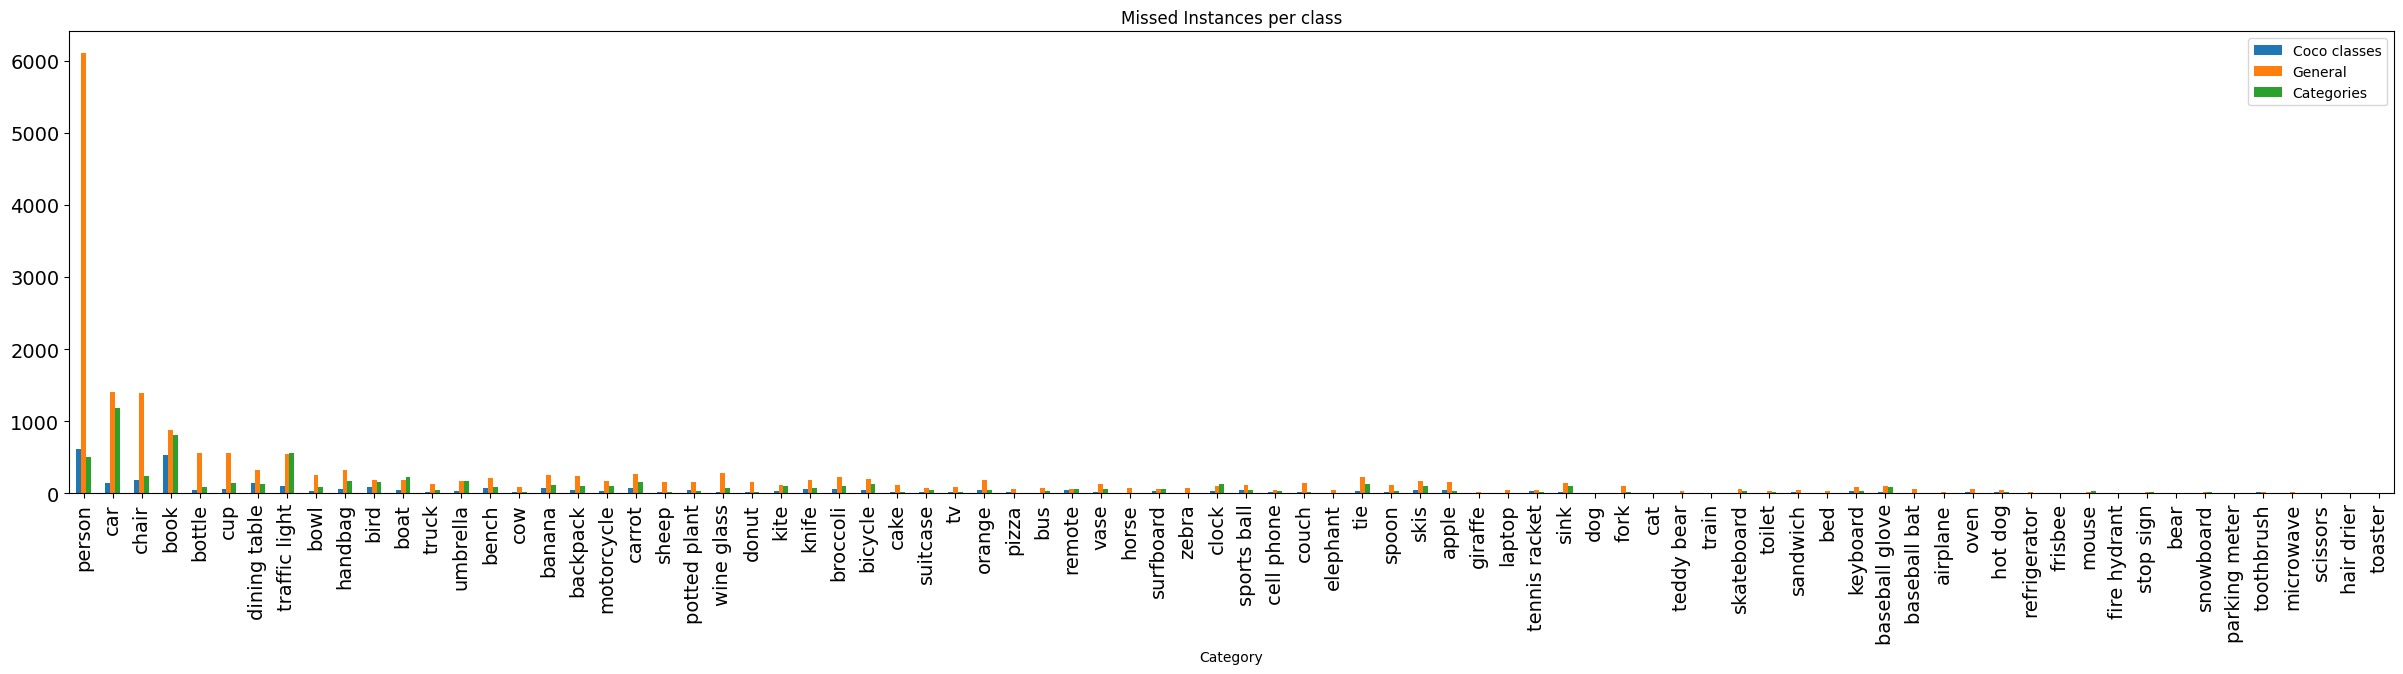

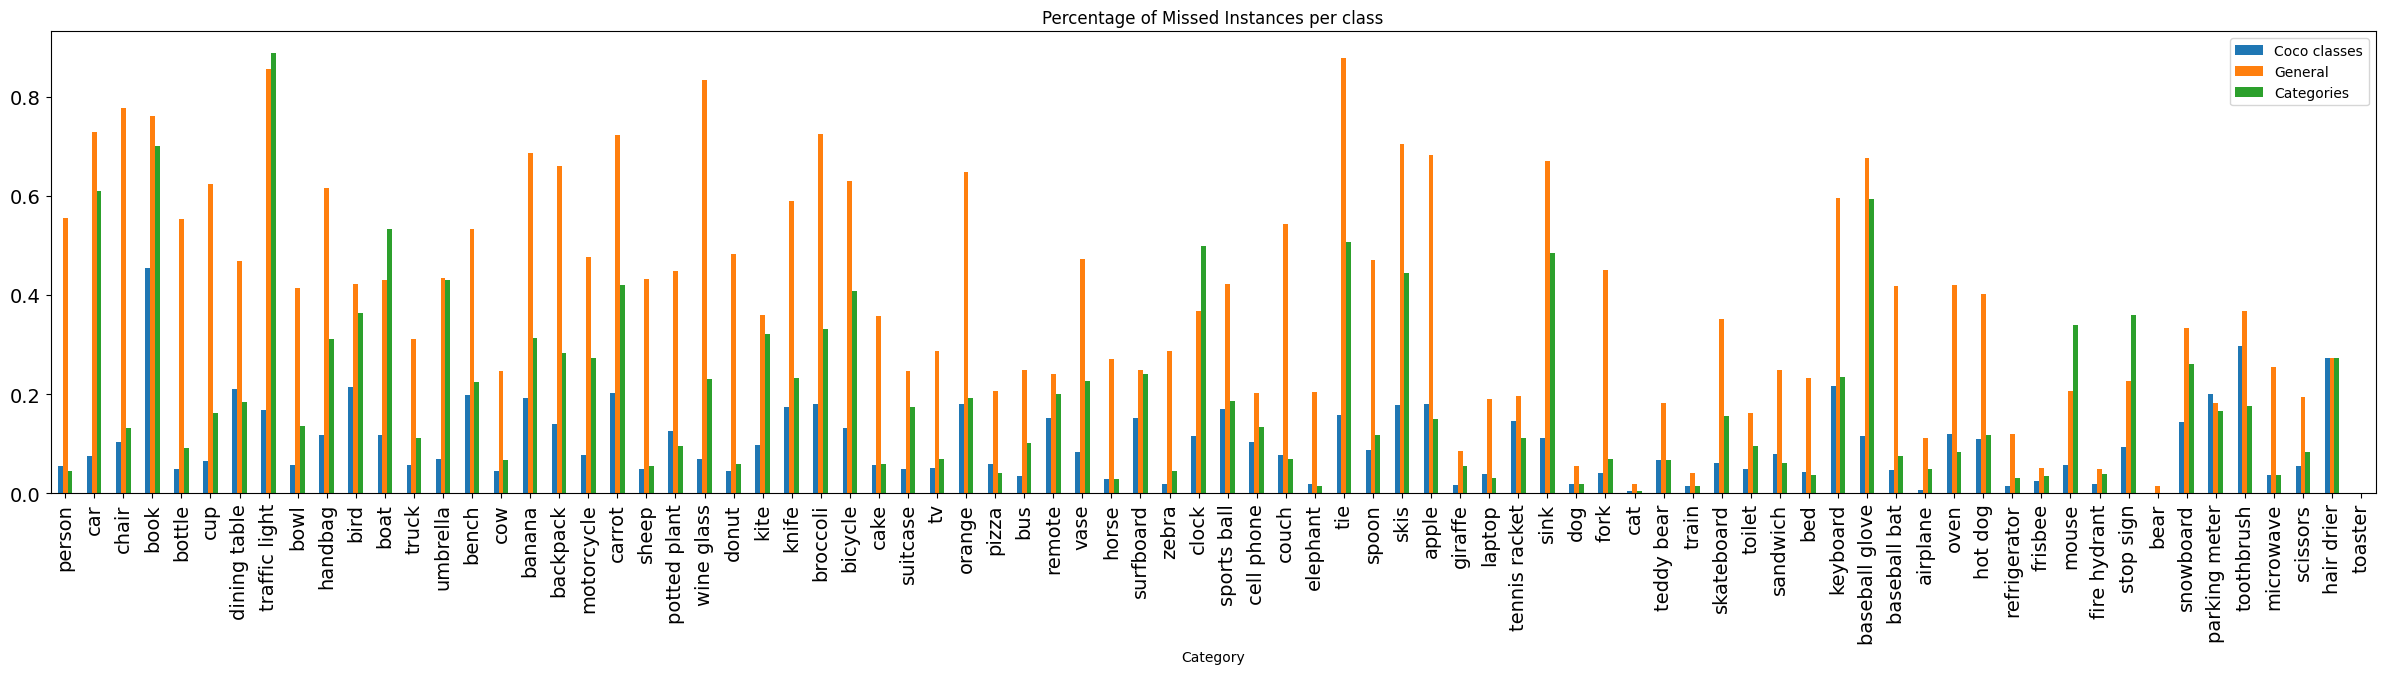

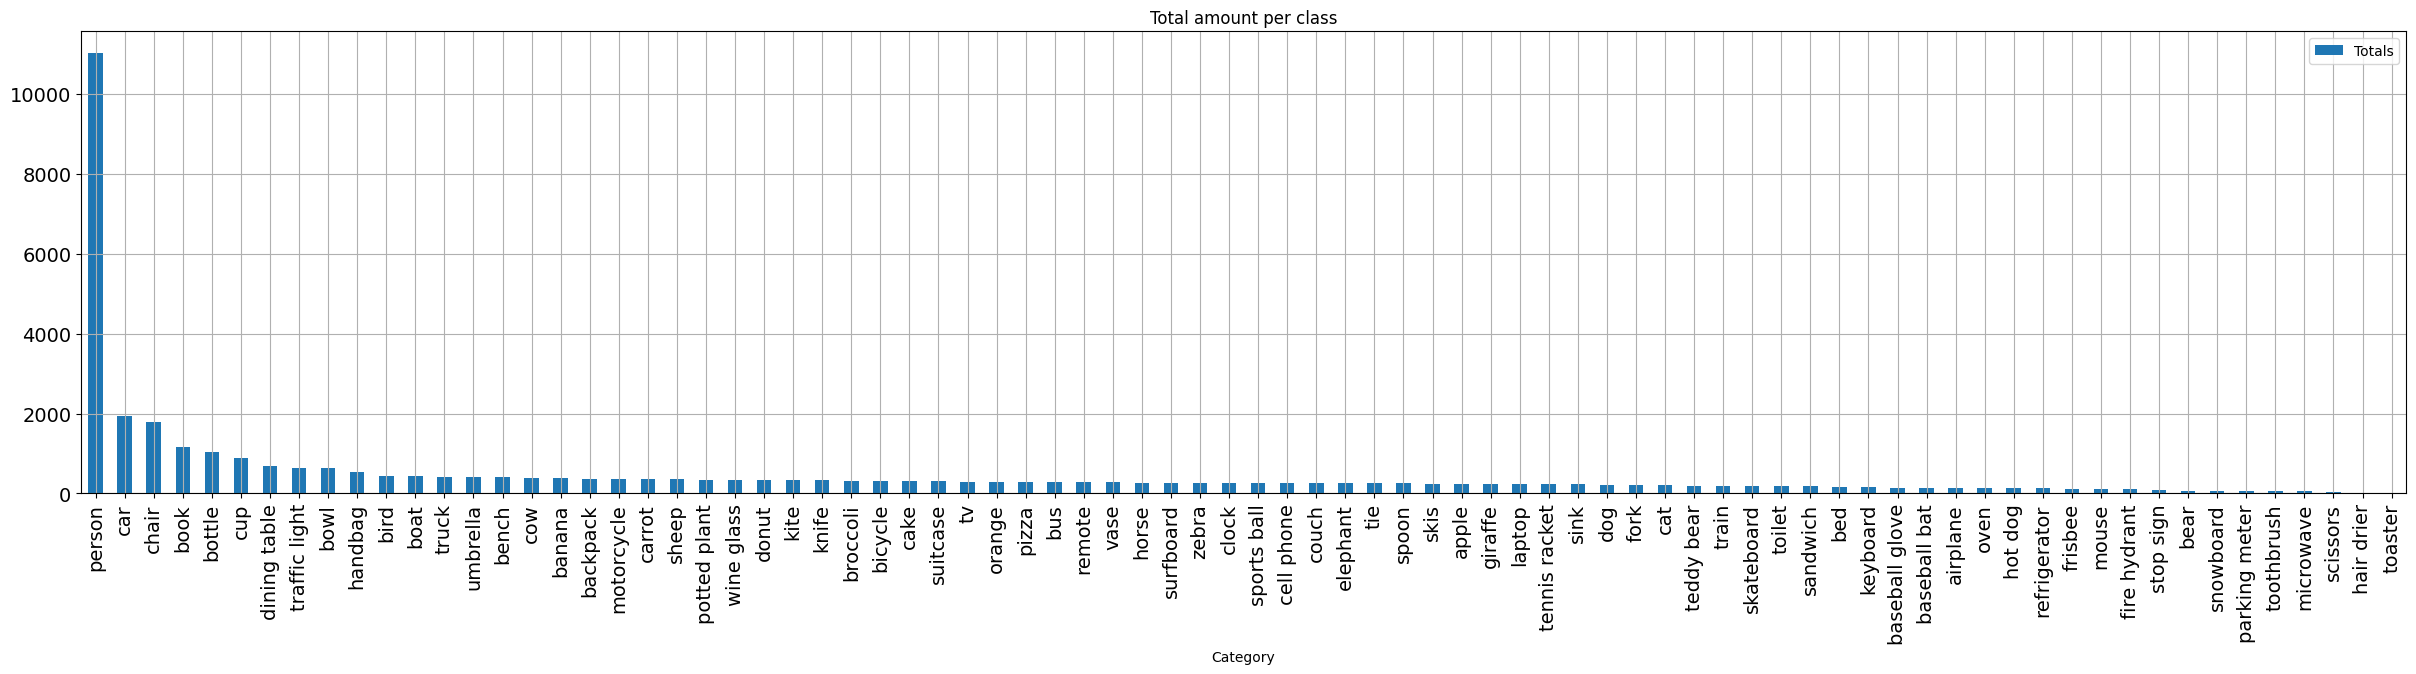

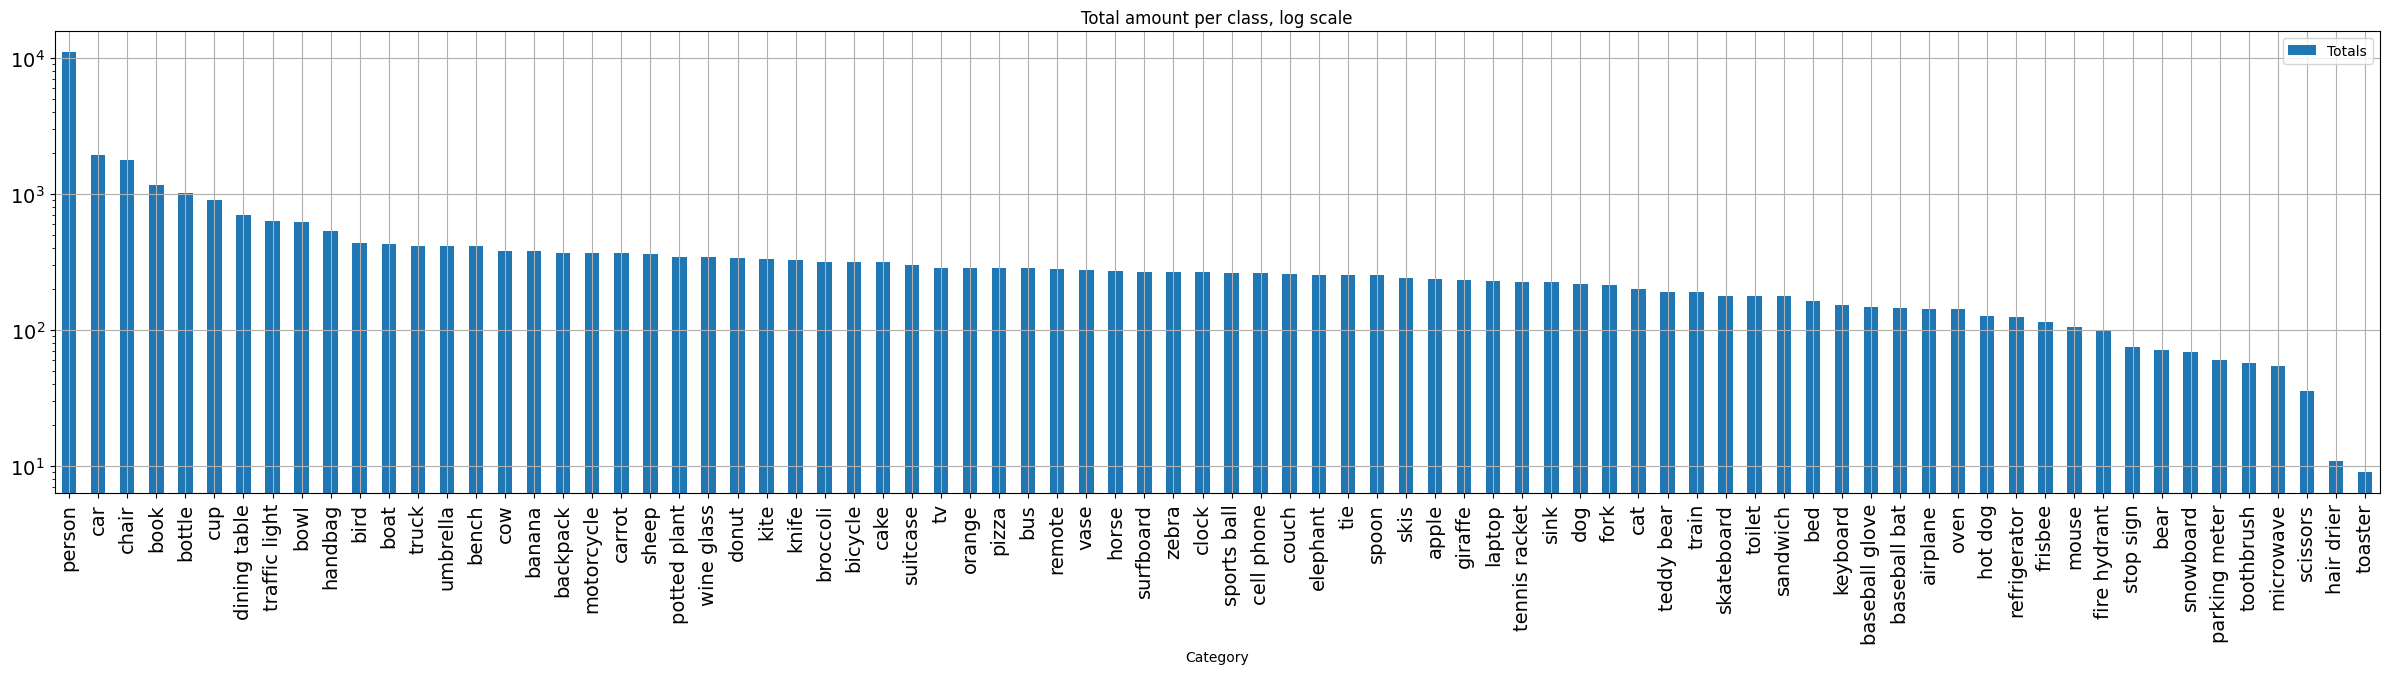

In [91]:
paths = [
    "./out/pipeline_results/GroundingDinoTiny_SamWrapper_b_dataset_defaults_coco_val_5000_09_04",
    "./out/pipeline_results/GroundingDinoTiny_SamWrapper_b_general_coco_val_5000_09_04",
    "./out/pipeline_results/GroundingDinoTiny_SamWrapper_b_categories_coco_val_5000_09_04",
]
names=["Coco classes","General","Categories"]

absolute,relative = utils.comparison(paths=paths, names=names, coco_dataset=coco_dataset)
absolute = absolute.sort_values(by="Totals", ascending=False)
relative = relative.sort_values(by="Totals", ascending=False)

to_show = absolute.columns[:4]
fontsize = 14
figsize=(30,6)
# plot grouped bar chart
absolute[to_show].plot(
    x="Category",
    kind="bar",
    stacked=False,
    title="Missed Instances per class",
    figsize=figsize,
    fontsize=fontsize,
)

# plot grouped bar chart
relative[to_show].plot(
    x="Category",
    kind="bar",
    stacked=False,
    title="Percentage of Missed Instances per class",
    figsize=figsize,
    fontsize=fontsize,
)
absolute[["Totals", "Category"]].plot(
    x="Category",
    title = "Total amount per class",
    kind="bar",
    figsize=figsize,
    grid=True,
    fontsize=fontsize,
)

absolute[["Totals", "Category"]].plot(
    x="Category",
    kind="bar",
    figsize=figsize,
    title="Total amount per class, log scale",
    logy=True,
    grid=True,
    fontsize=fontsize,
)

In [ ]:
# for one df
plt.figure(figsize=(20, 6))
plt.bar(df['category'], df['missed'])
plt.xlabel('Category')
plt.ylabel('Number of Missed Instances')
plt.title('Coco class names')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#df1- coco
#df2 - general
#df3 - categories

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 6))

# Plot the dataframes
ax.bar(df1['category'], df1['missed'], label='Coco class names',alpha=0.5)
ax.bar(df2['category'], df2['missed'], label='DataFrame 2',alpha=0.5)
ax.bar(df3['category'], df3['missed'], label='DataFrame 3',alpha=0.5)

# Set the x-axis label, y-axis label, and title
ax.set_xlabel('Category')
ax.set_ylabel('Number of Missed Instances')
ax.set_title('Comparison of Missed Instances')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [21]:
print(frame_boxes.columns)
filtered = frame_boxes[frame_boxes["iou"] == 0]
filtered.aggregate([])

for idx in range(len(filtered_frame_boxes)):
    row = filtered.iloc[idx]
    img_id = int(row["image_id"])
    image = coco_dataset[img_id]["image"]
    
    utils.grid_masks_boxes(
        image=image, boxes =boxes[idcs], scale=4
    )

Index(['image_id', 'box_id', 'gt', 'match', 'iou', 'gt_class'], dtype='object')


NameError: name 'hh' is not defined

### Comparison


In [ ]:
# TODO: rewrite for the new-er saving format 

In [2]:
path1 = "./out/pipeline_results/gt_boxes_middle_sam1_b_coco_val_600_08_26"
_, config1, array_boxes1, array_masks1 = utils.load_results(path1)
size1= (config1["max_batch"] * config1["batchsize"])

In [4]:
path2 = "./out/pipeline_results/gt_boxes_sam1_b_coco_val_600_08_26"
_, config2, array_boxes2, array_masks2 = utils.load_results(path2)
size2= (config2["max_batch"] * config2["batchsize"])

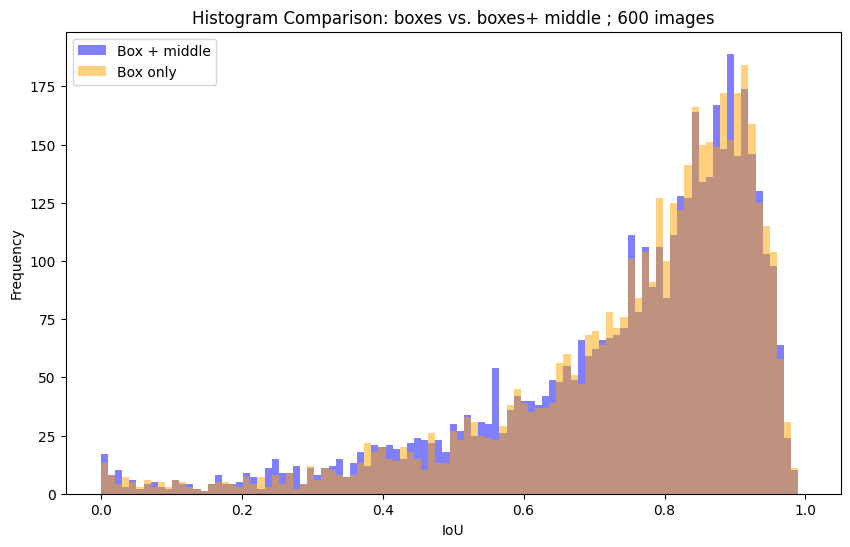

In [5]:
# put 2 arrays of IoUs here, here is an example with masks and boxes, not important
first = array_masks1
second = array_masks2

plt.figure(figsize=(10, 6))

# Plot the "large" histogram
bins = np.linspace(0, 1, 100)
plt.hist(first, bins=bins, alpha=0.5, label="Box + middle", color="blue")

# Plot the "base" histogram
plt.hist(second, bins=bins, alpha=0.5, label='Box only', color='orange')

# Add labels and title
plt.xlabel('IoU')
plt.ylabel('Frequency')
assert(size1 == size2)
plt.title(f"Histogram Comparison: boxes vs. boxes+ middle ; {size} images")

# Add legend
plt.legend()

# Show the plot
plt.show()